### PCA 

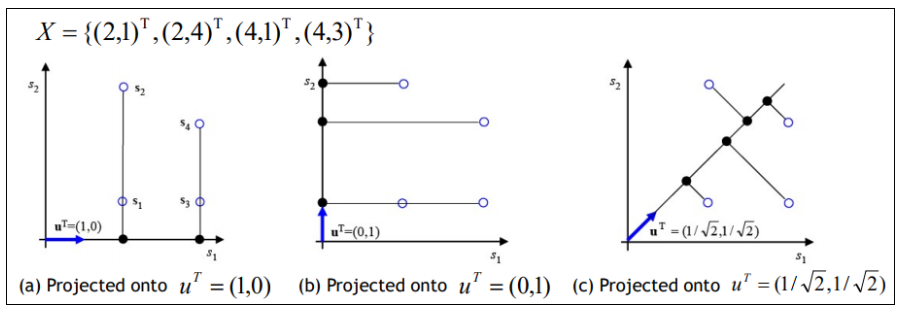

각각의 점을 s1, s2, s3, s4라고 하자.  
이 벡터들을 u라고 하는 벡터에 의해 projection한다고 가정해 보자. 위 예시가 최적의 projection은 아니지만, 대략적은 방법은 다음과 같다.  

__PCA의 목적은 최소한의 loss를 가지고 정보를 압축하는 것이다. 이를 달리 얘기하면, 가장 높은 분산을 가지는 차원으로 축소를 진행하는 것이다.__

위의 그림에서 상대적으로 분산은 c가 제일 크다. a, b는 4개의 데이터가 2개로 합쳐지고 분산도 작다. 반면, c는 데이터가 한 축으로 합쳐지더라도 4개가 구분되고, 분산이 크다. 따라서 좋은 차원 축소는, 차원이 줄어들더라도 분산이 커서 데이터가 구별이 되어야 한다. 따라서, PCA는 항상 축을 찾을 때 분산이 큰 것부터 작은 순으로 찾는다.

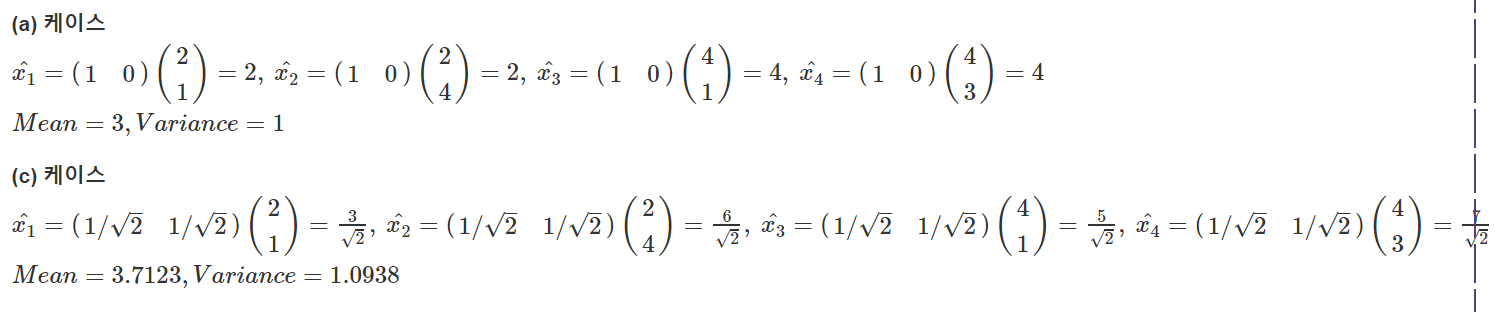

### 최적의 u를 찾자

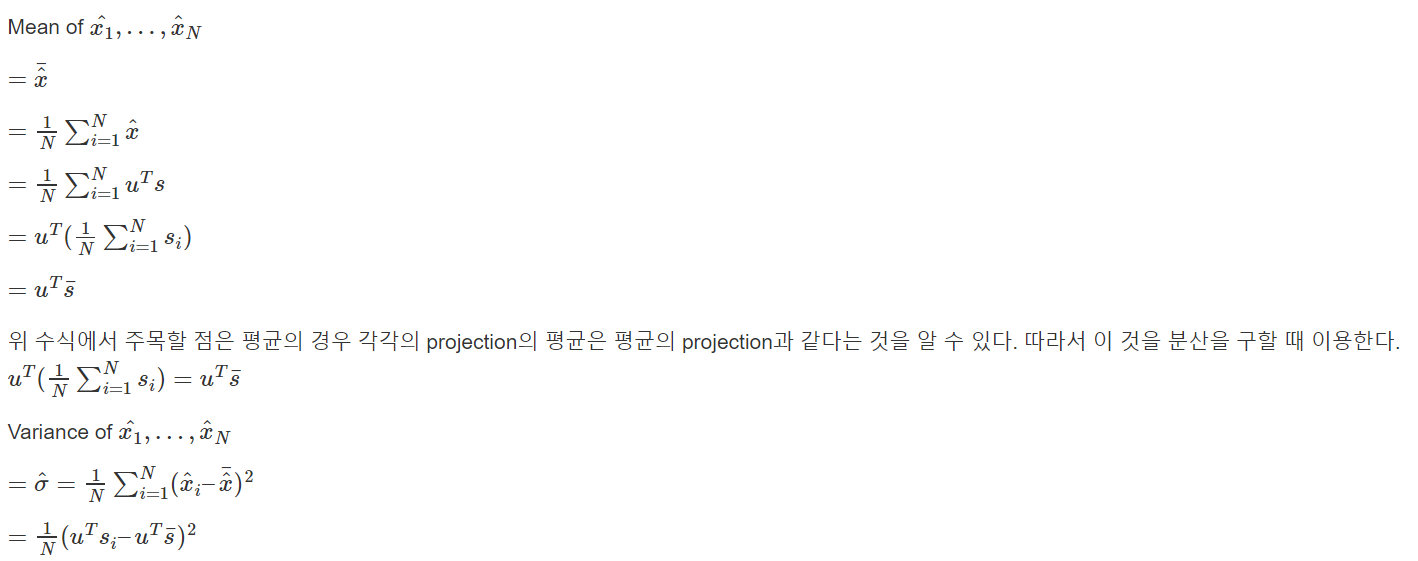

__우리의 목적은 분산을 최대한 하는 u를 찾는 것이다. 라그랑주 해법을 사용한다__

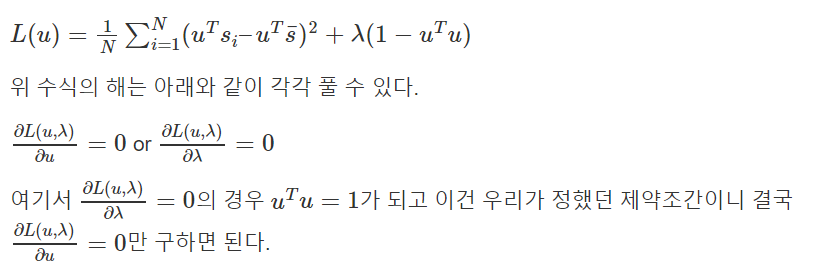

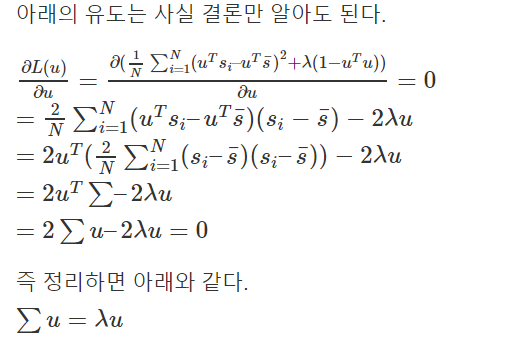

u는 공분산행렬에 대한 eigen vector이다. 즉 공분산의 eigen vector와 eigen value를 구하면 PCA를 수행할 수 있다.

### PCA 예제로 구해보자!

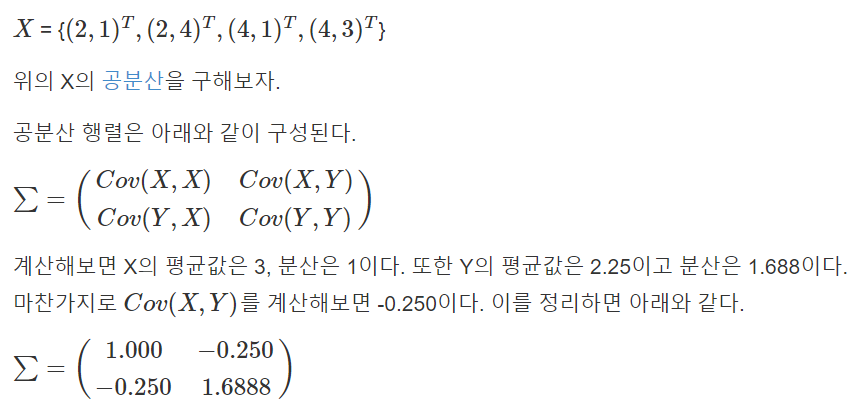

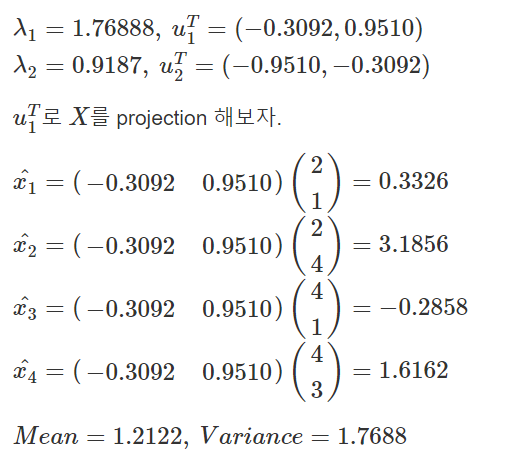

분산이 이제까지 구한 것 중에서 가장 크다. 실제로 최대값이다!  
그리고 분산은 eigen value와 같다.

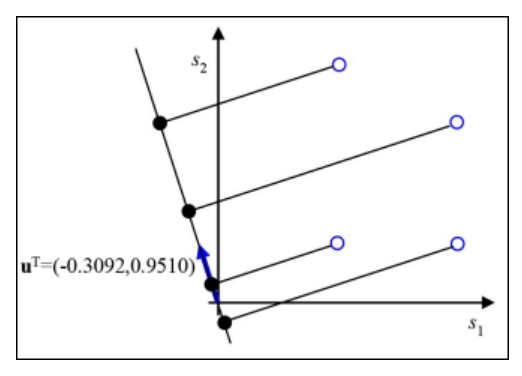

공분산을 통해 구한 고유값은 람다의 값이 클수록 분산이 크다. 또한 람다는 급격하게 수렴하는 성질이 있다. 따라서 이를 이용하여 적절한 람다의 갯수를 찾을 수 있는데, 이것 이 곧 적절히 축소될 차원을 의미한다.

### Python 예시

In [4]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [11]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [12]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [13]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [14]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [28]:
import plotly  as py
plotly.tools.set_credentials_file(username='ashtree22', api_key='mBp7VzH1eJHVcjalmfGg') 

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.plotly.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ashtree22/0 or inside your plot.ly account where it is named 'selecting-principal-components'


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

